<a href="https://colab.research.google.com/github/erlonL/Projeto-ICD/blob/main/projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PERGUNTAS:
- QUAIS ASPECTOS MAIS INFLUENCIAM E MENOS INFLUENCIAM NUMA DOENÇA CARDÍACA
- QUAIS COMBOS DE AGRAVANTES MAIS INFLUENCIAM NUMA DOENÇA CARDÍACA
- COMO OS HABITOS E FATORES CONTROLÁVEIS INFLUENCIAM NUMA DOENÇA CARDÍACA
- COMO A RAÇA E O SEXO PODE INFLUENCIAR (POSSÍVEL ANÁLISE GENÉTICA)





## Importando bibliotecas e dados 

In [165]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("https://raw.githubusercontent.com/erlonL/Projeto-ICD/main/heart-disease.csv")
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


## Tratando os dados (parte 1)

In [166]:
df = df.dropna() # retirando possíveis elementos NaN/Na

### Substituindo os valores em 'GenHealth' de texto para valores numéricos

In [167]:
df['GenHealthNUM'] = df['GenHealth'].replace({"Poor": 1.0, "Fair": 2.0, "Good": 3.0, "Very good": 4.0, "Excellent": 5.0}) # criando uma nova coluna numérica baseada nos valores de GenHealth
# A nova coluna GenHealthNUM segue uma ordem de classificação, em que 1 é a pior saúde geral e 5 a melhor

### Avaliando os dados

In [168]:
# utilizando o describe do pandas
# para extrair informações diversas sobre cada coluna do dataset
print(df.describe(include = 'all'),'\n\n')

       HeartDisease            BMI Smoking AlcoholDrinking  Stroke  \
count        319795  319795.000000  319795          319795  319795   
unique            2            NaN       2               2       2   
top              No            NaN      No              No      No   
freq         292422            NaN  187887          298018  307726   
mean            NaN      28.325399     NaN             NaN     NaN   
std             NaN       6.356100     NaN             NaN     NaN   
min             NaN      12.020000     NaN             NaN     NaN   
25%             NaN      24.030000     NaN             NaN     NaN   
50%             NaN      27.340000     NaN             NaN     NaN   
75%             NaN      31.420000     NaN             NaN     NaN   
max             NaN      94.850000     NaN             NaN     NaN   

        PhysicalHealth   MentalHealth DiffWalking     Sex AgeCategory    Race  \
count     319795.00000  319795.000000      319795  319795      319795  319795 

In [169]:
# Avaliar a porcentagem de presença de cada elemento numa coluna
for i in df:
  counts = df[i].value_counts()
  porcentagem = counts / len(df) * 100
  print(porcentagem,'\n----------------------------------------------\n')


No     91.440454
Yes     8.559546
Name: HeartDisease, dtype: float64 
----------------------------------------------

26.63    1.176379
27.46    0.865242
27.44    0.851483
24.41    0.843040
27.12    0.789568
           ...   
59.85    0.000313
50.59    0.000313
92.53    0.000313
62.95    0.000313
46.56    0.000313
Name: BMI, Length: 3604, dtype: float64 
----------------------------------------------

No     58.752326
Yes    41.247674
Name: Smoking, dtype: float64 
----------------------------------------------

No     93.190325
Yes     6.809675
Name: AlcoholDrinking, dtype: float64 
----------------------------------------------

No     96.22602
Yes     3.77398
Name: Stroke, dtype: float64 
----------------------------------------------

0.0     70.854454
30.0     6.100471
2.0      4.652981
1.0      3.279914
3.0      2.694539
5.0      2.378399
10.0     1.705155
15.0     1.567254
7.0      1.447490
4.0      1.397145
20.0     1.005644
14.0     0.904642
6.0      0.397129
25.0     0.363983

In [170]:
doentes = df.loc[df['HeartDisease'] == 'Yes']
doentes.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime,GenHealthNUM
count,27373.000000,27373.000000,27373.000000,27373.000000,27373.000000
mean,29.401592,7.808242,4.641764,7.136156,2.766083
std,6.577151,11.487819,9.171932,1.780863,1.087426
min,12.210000,0.000000,0.000000,1.000000,1.000000
25%,25.060000,0.000000,0.000000,6.000000,2.000000
50%,28.340000,0.000000,0.000000,7.000000,3.000000
75%,32.690000,15.000000,4.000000,8.000000,4.000000
max,83.330000,30.000000,30.000000,24.000000,5.000000


In [171]:
for i in doentes:
  counts = doentes[i].value_counts()
  porcentagem = counts / len(df) * 100
  print(porcentagem,'\n----------------------------------------------\n')


Yes    8.559546
Name: HeartDisease, dtype: float64 
----------------------------------------------

26.63    0.091621
27.12    0.072546
29.53    0.060977
24.41    0.059100
27.44    0.057850
           ...   
47.59    0.000313
22.57    0.000313
40.56    0.000313
41.52    0.000313
35.92    0.000313
Name: BMI, Length: 2194, dtype: float64 
----------------------------------------------

Yes    5.014775
No     3.544771
Name: Smoking, dtype: float64 
----------------------------------------------

No     8.202755
Yes    0.356791
Name: AlcoholDrinking, dtype: float64 
----------------------------------------------

No     7.187104
Yes    1.372442
Name: Stroke, dtype: float64 
----------------------------------------------

0.0     4.509764
30.0    1.444363
2.0     0.365547
15.0    0.290811
5.0     0.280179
3.0     0.263606
10.0    0.262043
20.0    0.200441
1.0     0.189184
4.0     0.154474
7.0     0.145406
14.0    0.097563
25.0    0.079426
6.0     0.054097
8.0     0.037524
28.0    0.033772
1

# Exploração inicial (Fase 2)

In [172]:
 # selecionando apenas as colunas com elementos numéricos 
numeric_cols = df.select_dtypes(include=np.number).columns

# extraindo as medidas de centralidade e a dispersão das variáveis numéricas
for i in numeric_cols:  
  print(f'A media de {i} é:', df[i].mean())
  print(f'A mediana de {i} é:', df[i].median())
  print(f'A moda de {i} é:', df[i].mode())
  print(f'A variância de {i} é:', df[i].var())
  print(f'O desvio padrão de {i} é:', df[i].std(),'\n---------------------------------------------------------\n')


A media de BMI é: 28.325398520927465
A mediana de BMI é: 27.34
A moda de BMI é: 0    26.63
Name: BMI, dtype: float64
A variância de BMI é: 40.40000975842417
O desvio padrão de BMI é: 6.356100200470739 
---------------------------------------------------------

A media de PhysicalHealth é: 3.3717100017198516
A mediana de PhysicalHealth é: 0.0
A moda de PhysicalHealth é: 0    0.0
Name: PhysicalHealth, dtype: float64
A variância de PhysicalHealth é: 63.216018625695156
O desvio padrão de PhysicalHealth é: 7.950850182571368 
---------------------------------------------------------

A media de MentalHealth é: 3.898366140808956
A mediana de MentalHealth é: 0.0
A moda de MentalHealth é: 0    0.0
Name: MentalHealth, dtype: float64
A variância de MentalHealth é: 63.28576738872075
O desvio padrão de MentalHealth é: 7.955235218943607 
---------------------------------------------------------

A media de SleepTime é: 7.097074688472302
A mediana de SleepTime é: 7.0
A moda de SleepTime é: 0    7.0
N

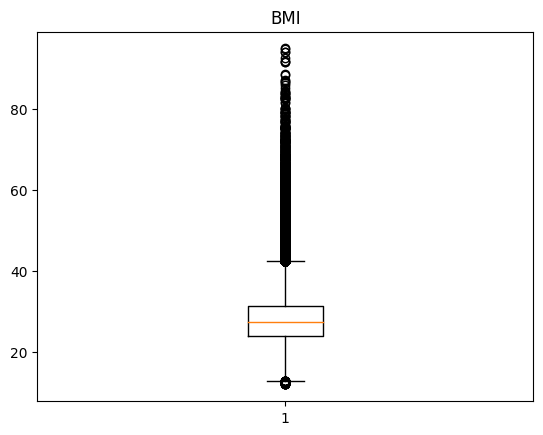

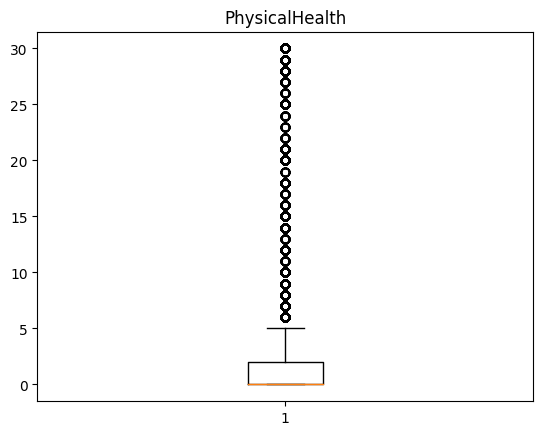

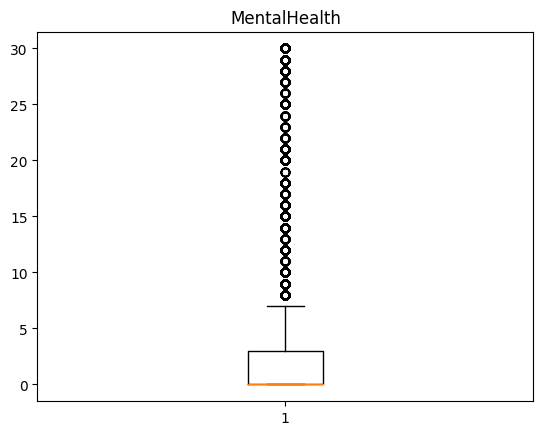

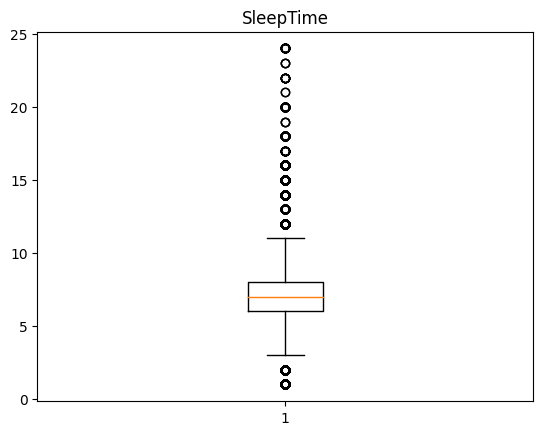

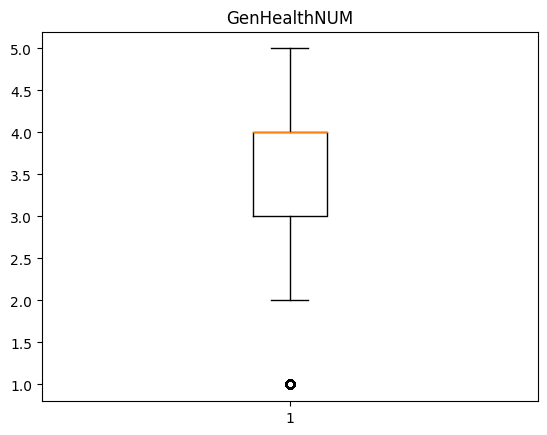

In [173]:
# selecionando apenas as colunas numéricas para realizar o boxplot
df_numeric = df.select_dtypes(include='number')

for coluna in df_numeric.columns:
    plt.boxplot(df_numeric[coluna])
    plt.title(coluna)
    plt.show()
  

# Criando novas colunas e novo DataFrame com apenas valores numéricos.

In [174]:
# Criando novas colunas que contêm valores binários em formato numérico.

df['HeartDiseaseNUM'] = df['HeartDisease'].replace({"Yes": 1.0, "No": 0.0}) 
df['SmokingNUM'] = df['Smoking'].replace({"Yes": 1.0, "No": 0.0})
df['AlcoholDrinkingNUM'] = df['AlcoholDrinking'].replace({"Yes": 1.0, "No": 0.0})
df['StrokeNUM'] = df['Stroke'].replace({"Yes": 1.0, "No": 0.0}) 
df['DiffWalkingNUM'] = df['DiffWalking'].replace({"Yes": 1.0, "No": 0.0}) 
df['PhysicalActivityNUM'] = df['PhysicalActivity'].replace({"Yes": 1.0, "No": 0.0})
df['AsthmaNUM'] = df['Asthma'].replace({"Yes": 1.0, "No": 0.0})
df['KidneyDiseaseNUM'] = df['KidneyDisease'].replace({"Yes": 1.0, "No": 0.0})
df['SkinCancerNUM'] = df['SkinCancer'].replace({"Yes": 1.0, "No": 0.0})


In [175]:
# Essa coluna possui valores diferentes das outras, assumimos que  
#"No, borderline diabetes" vale 0.0 e "Yes (during pregnancy)" vale 1.0 

df['DiabeticNUM'] = df['Diabetic'].replace({"Yes": 1.0, "No": 0.0, "No, borderline diabetes": 0.0, "Yes (during pregnancy)": 1.0})

In [176]:
df_numeric = df.select_dtypes(include='number') # selecionando apenas as colunas numéricas

# Visualização de dados (Fase 3)

## Avaliando possíveis gráficos de histograma

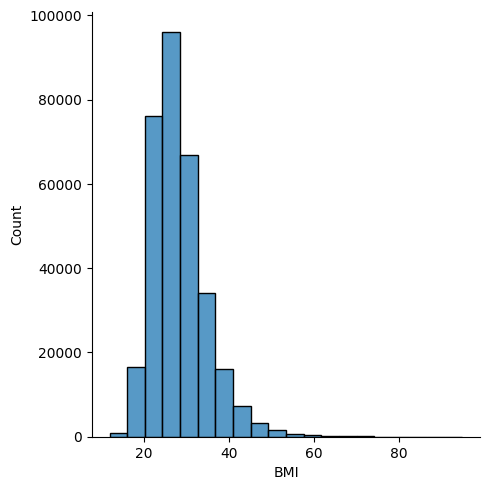

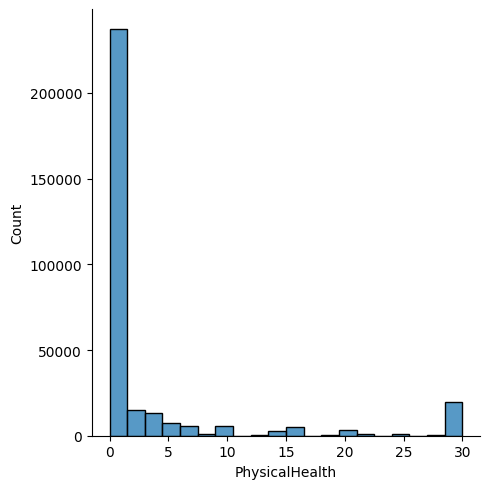

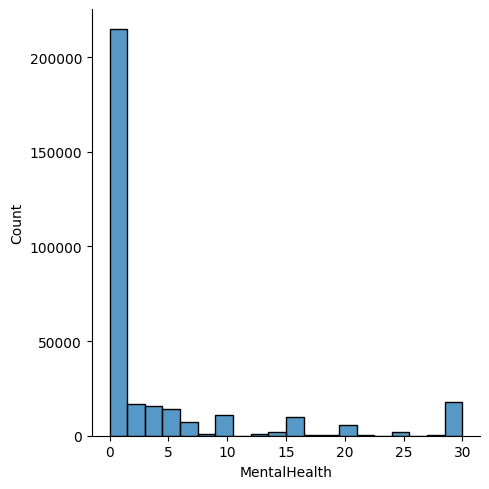

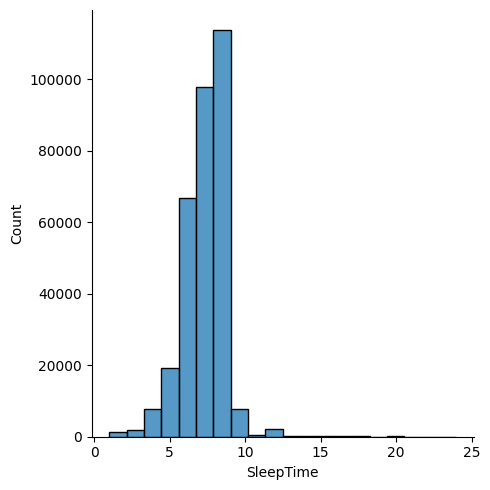

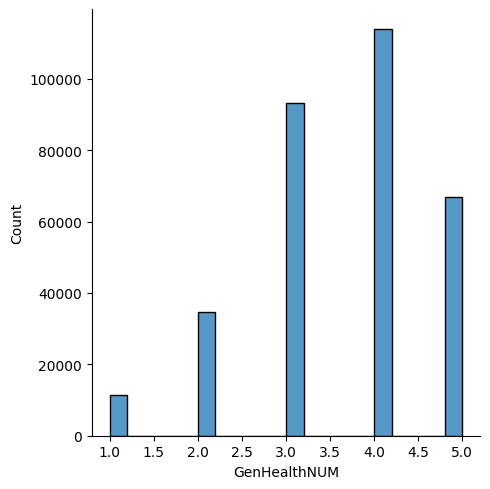

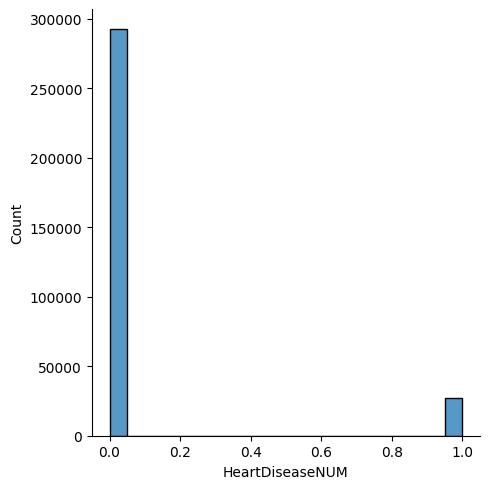

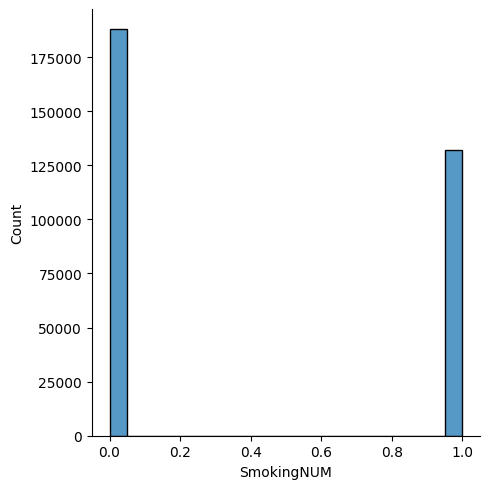

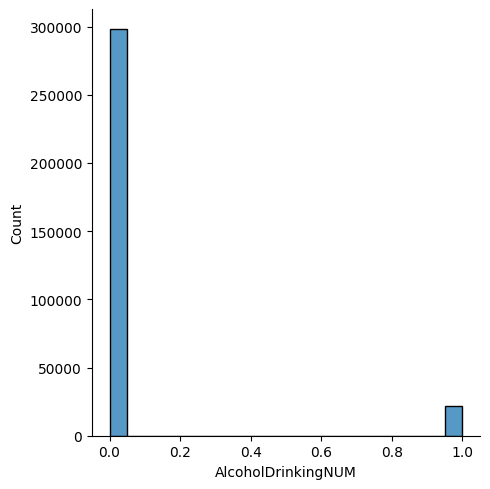

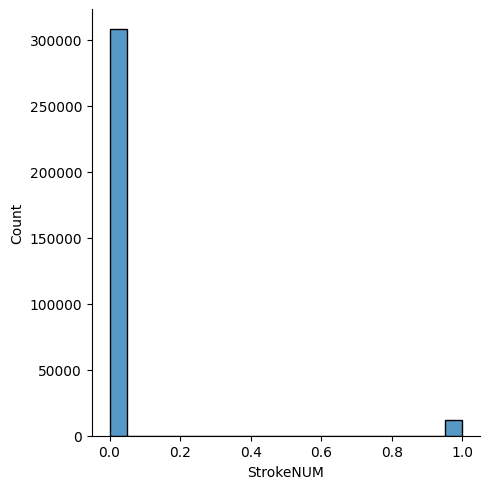

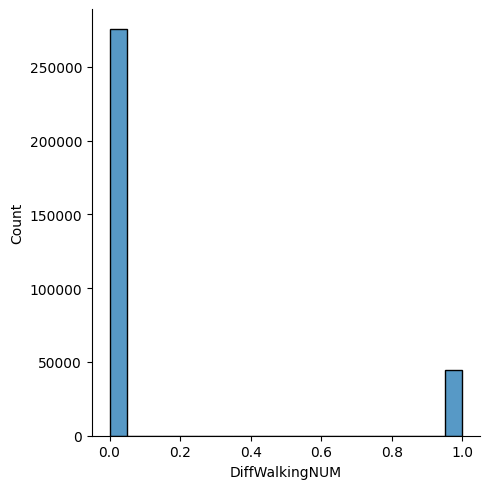

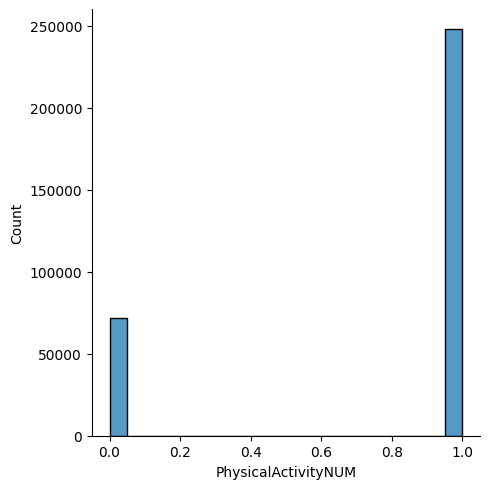

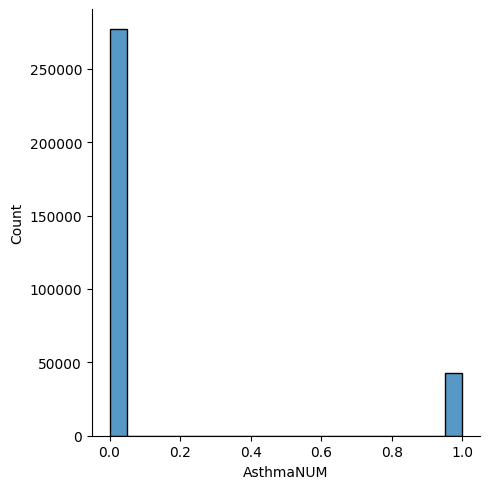

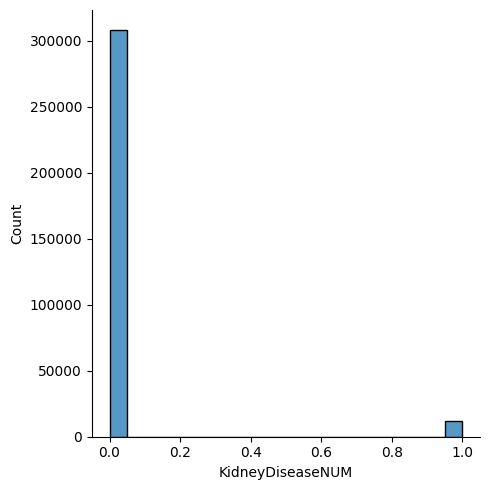

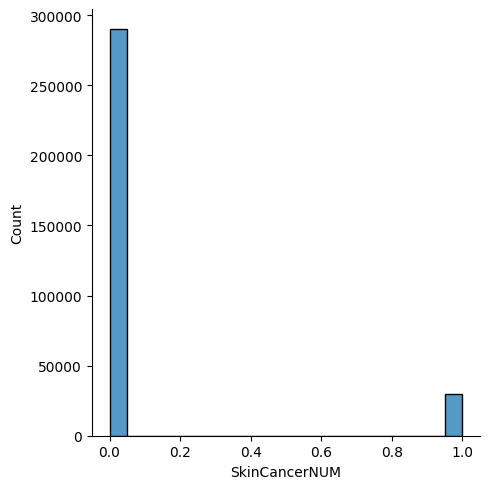

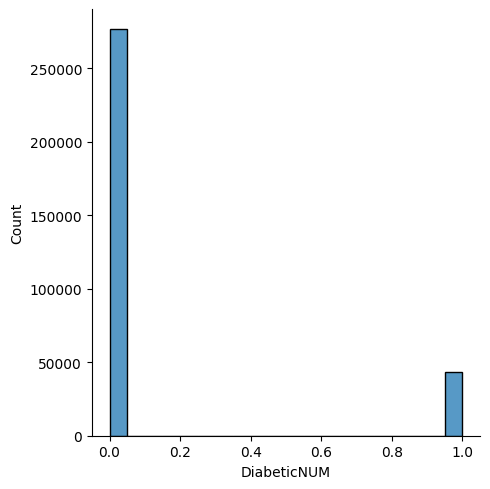

In [177]:
for i in df_numeric:
  coluna = df_numeric[i]
  sns.displot(coluna, bins = 20)  
  plt.show()


## Gráficos

### Conhecendo as frequências dos dados (Histogramas)

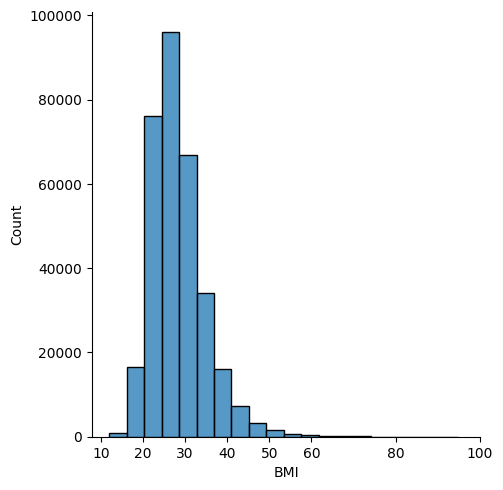

In [178]:
# Índices de BMI (IMC)
sns.displot(df_numeric['BMI'], bins = 20)
plt.xticks([10, 20, 30, 40, 50, 60, 80, 100])
plt.show()

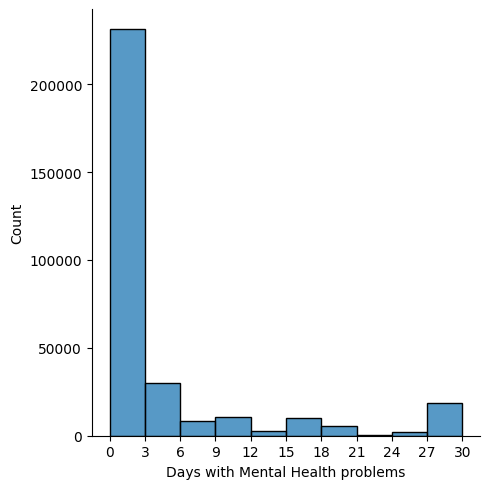

In [179]:
# Dias com problemas de saúde mental
sns.displot(df_numeric['MentalHealth'], bins = 10)
plt.xlabel("Days with Mental Health problems")
plt.xticks(np.arange(0, 33, 3)) # define o xticks para 0 a 30 com step de 3.
plt.show()

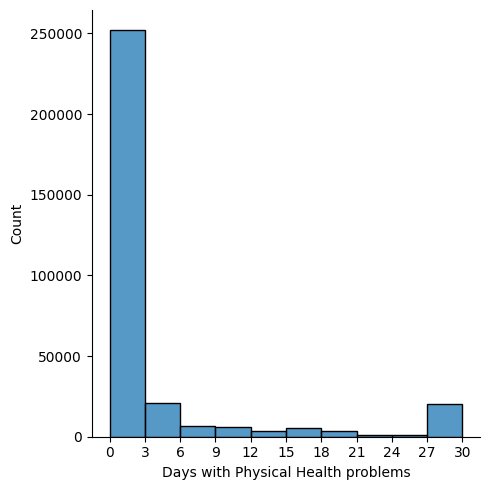

In [180]:
# Dias com problemas físicos
sns.displot(df_numeric['PhysicalHealth'], bins = 10)
plt.xlabel("Days with Physical Health problems")
plt.xticks(np.arange(0, 33, 3)) # define o xticks para 0 a 30 com step de 3.
plt.show()

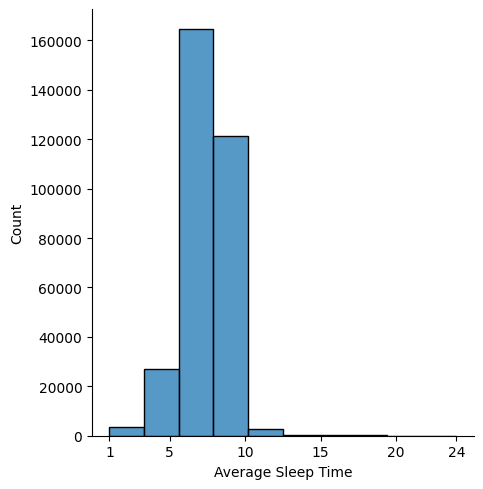

In [181]:
# Média de horas dormidas
sns.displot(df_numeric['SleepTime'], bins = 10)
plt.xlabel("Average Sleep Time")
plt.xticks([1, 5, 10, 15, 20, 24])
plt.show()

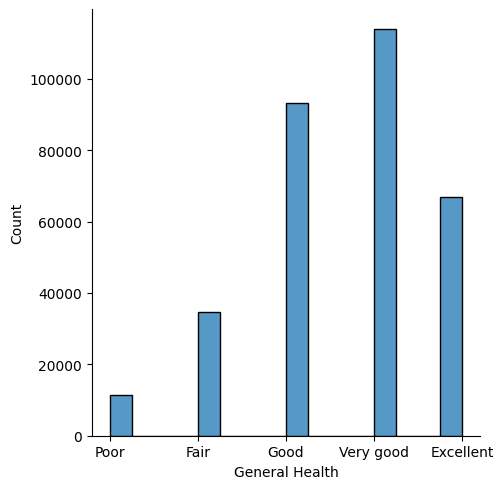

In [182]:
# Saúde geral
sns.displot(df_numeric['GenHealthNUM'], binwidth = 0.25)

# Labels para 1, 2, 3, 4, 5, respectivamente
xtick_labels = ["Poor", "Fair", "Good", "Very good", "Excellent"] 
plt.xticks([1, 2, 3, 4, 5], xtick_labels)

plt.xlabel("General Health")
plt.show()

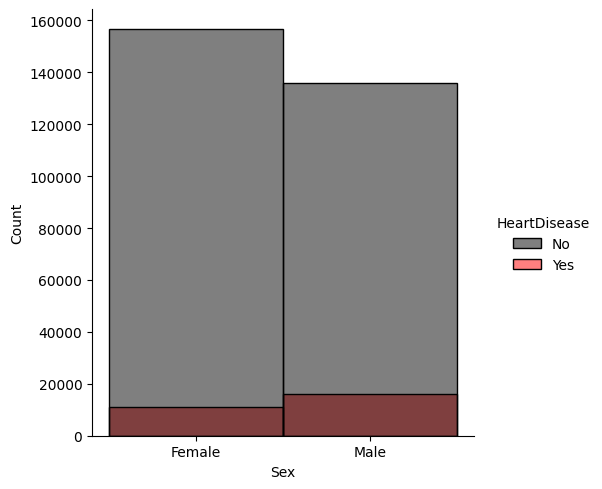

In [252]:
# Relação de gênero e problemas no coração
sns.displot(data = df, x = "Sex", hue = 'HeartDisease', alpha = 0.5, palette = reversed("dark"))
plt.show()

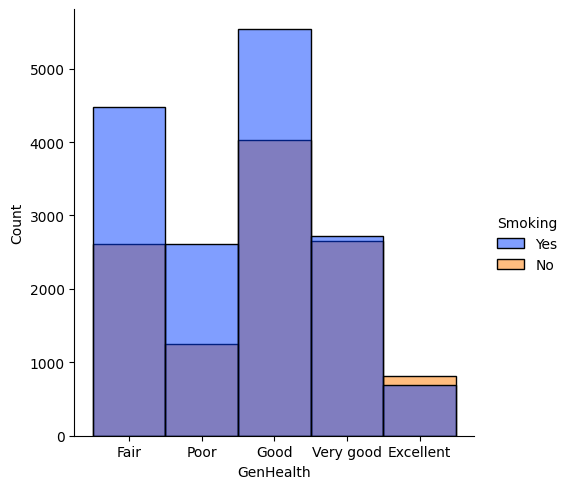

In [265]:
# Relação (utlizando pessoas que tiveram problemas no coração)
# de saúde geral com o ato de fumar 
sns.displot(data = df.loc[df['HeartDisease'] == 'Yes'], x = "GenHealth", hue = 'Smoking', alpha = 0.5, palette = "bright")
plt.show()

### Gráficos de linha / Barra

#### Relação SleepTime / Days with Mental / Physical problems

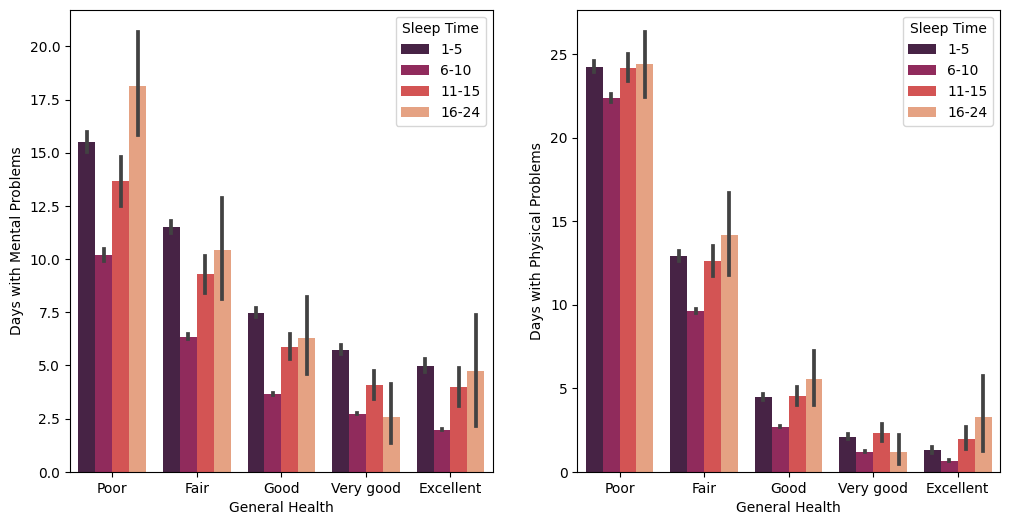

In [304]:
# Categorizando os dados de SleepTime

bins = [1, 5, 10, 15, 24]
labels = ['1-5', '6-10', '11-15', '16-24']
df['SleepTimeCat'] = pd.cut(df['SleepTime'], bins=bins, labels=labels)

# Criando uma figura com dois eixos de plotagem
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

# Plotando o primeiro gráfico no primeiro eixo de plotagem
sns.barplot(data=df, x="GenHealthNUM", y="MentalHealth", hue="SleepTimeCat", alpha=1, palette="rocket", ax=ax1)
ax1.legend(title="Sleep Time")
ax1.set_xlabel("General Health")
ax1.set_ylabel("Days with Mental Problems")

ax1.set_xticks([0, 1, 2, 3, 4])
ax1.set_xticklabels(["Poor", "Fair", "Good", "Very good", "Excellent"])

# Plotando o segundo gráfico no segundo eixo de plotagem
sns.barplot(data=df, x="GenHealthNUM", y="PhysicalHealth", hue="SleepTimeCat", palette="rocket", ax=ax2)
ax2.legend(title="Sleep Time")
ax2.set_xlabel("General Health")
ax2.set_ylabel("Days with Physical Problems")

ax2.set_xticks([0, 1, 2, 3, 4])
ax2.set_xticklabels(["Poor", "Fair", "Good", "Very good", "Excellent"])

plt.show()


#### SleepTime / BMI

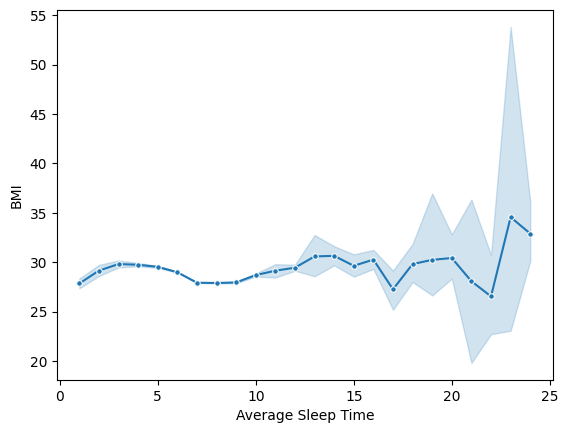

In [183]:
sns.lineplot(data = df_numeric, x = "SleepTime", y = "BMI", marker='o', markersize = 4)
plt.xlabel("Average Sleep Time")
plt.show()

Quanto maior o tempo dormido, maior a variação do BMI.

#### MentalHealth / PhysicalHealth (Dias)

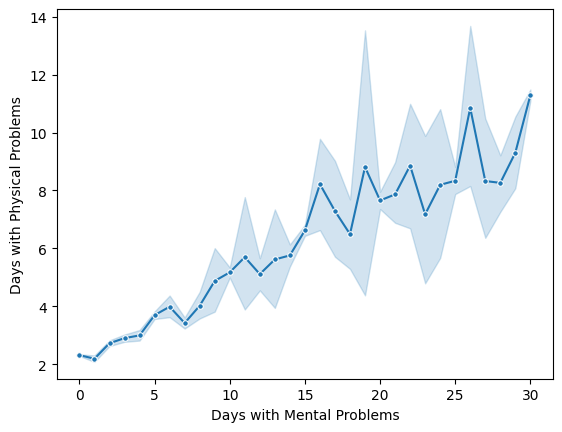

In [184]:
sns.lineplot(data = df_numeric, x = "MentalHealth", y = "PhysicalHealth", marker = 'o', markersize = 4)
plt.xlabel("Days with Mental Problems")
plt.ylabel("Days with Physical Problems")
plt.show()

Aqui percebe-se uma relação entre os dias com problemas de saúde física e mental, quanto maior um, maior o outro.

#### GenHealth / Physical/Mental Health

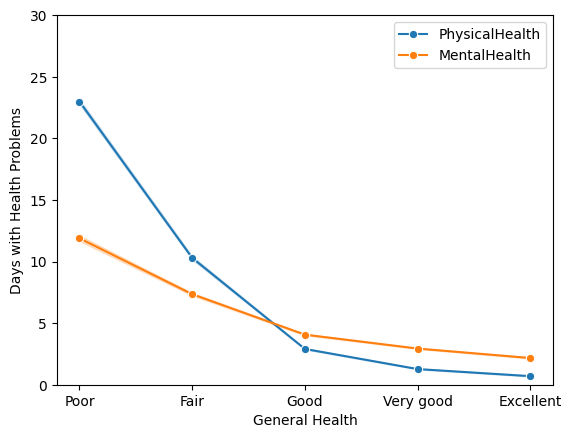

In [185]:
sns.lineplot(data = df_numeric, x = "GenHealthNUM", y = "PhysicalHealth", label = 'PhysicalHealth', marker = 'o')
sns.lineplot(data = df_numeric, x = "GenHealthNUM", y = "MentalHealth", label = 'MentalHealth', marker = 'o')

xtick_labels = ["Poor", "Fair", "Good", "Very good", "Excellent"]

plt.ylabel("Days with Health Problems")
plt.xlabel("General Health")
plt.ylim([0, 30])

# define os ticks do eixo x (não tem valores 1.5, 2.5,...) 
# e os labels para 1, 2, 3, 4, 5 conforme os dados
plt.xticks([1, 2, 3, 4, 5], xtick_labels)
plt.show()

Pode-se perceber que quanto maior os dias com problemas de saúde, pior vai ser a saúde geral. Também percebe-se que a saúde física tem um maior impacto na saúde geral do que a mental, pois a curva para 'PhysicalHealth' é maior.

#### GenHealth / SleepTime

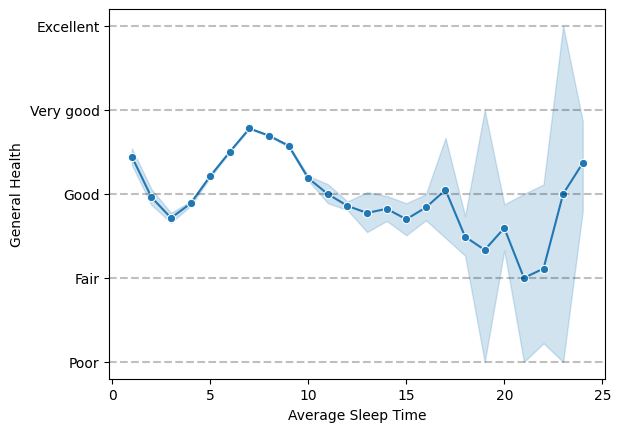

In [186]:
sns.lineplot(data = df_numeric, x = "SleepTime", y = "GenHealthNUM", marker='o')

# define os ticks do eixo x (não tem valores 1.5, 2.5,...)
# e os labels para 1, 2, 3, 4, 5 conforme os dados
xtick_labels = ["Poor", "Fair", "Good", "Very good", "Excellent"]
plt.yticks([1, 2, 3, 4, 5], xtick_labels)

plt.ylabel("General Health")
plt.xlabel("Average Sleep Time")

# define as posições das linhas pontilhadas
for i in range(1, 6):
    plt.axhline(y=i, linestyle='--', color='black', alpha = 0.25)

plt.show()

As pessoas que dormem entre 5 e 10 horas por dia tem as melhores saúdes gerais. Mais especificamente, as que dormem 7 horas por dia, tem o melhor índice de saúde geral.

#### PhysicalActivity / PhysicalHealth

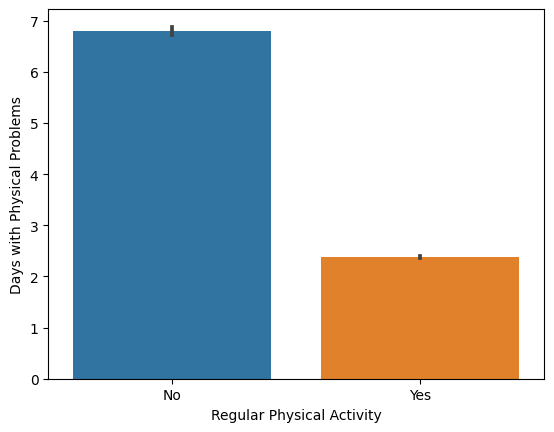

In [187]:
sns.barplot(data = df_numeric, x = "PhysicalActivityNUM", y = "PhysicalHealth")

plt.xticks([0.0, 1.0],["No", "Yes"]) # Mostra 0 como 'No' e 1 como 'Yes'
plt.xlabel("Regular Physical Activity")
plt.ylabel("Days with Physical Problems")

plt.show()

As pessoas que não fazem atividade física regularmente têm períodos maiores de dias com problemas de saúde física.

### Gráficos de dispersão

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


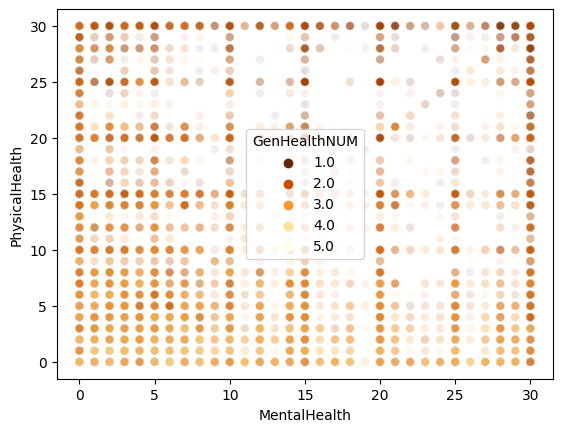

In [188]:
sns.scatterplot(data = df_numeric, x = "MentalHealth", y = "PhysicalHealth", alpha = 0.08, hue = "GenHealthNUM", palette = "YlOrBr_r")
plt.show()



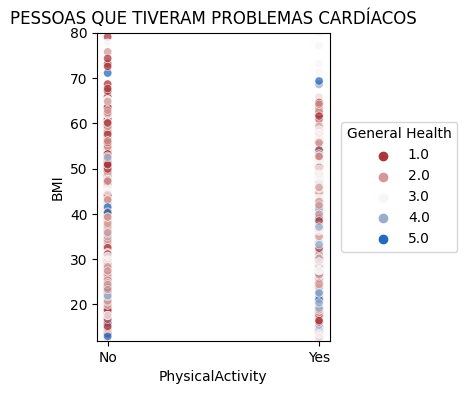

In [208]:
sns.scatterplot(data=df.loc[df['HeartDisease'] == 'Yes'], x="PhysicalActivity", y="BMI", alpha=0.75, hue="GenHealthNUM", palette="vlag_r")

plt.ylim([12, 80]) # Segundo a OMS: 40 Obeso classe III
plt.legend(bbox_to_anchor=(1.3, 0.5), loc = 'center', title = 'General Health')
plt.gcf().set_size_inches(3, 4)

plt.title("PESSOAS QUE TIVERAM PROBLEMAS CARDÍACOS")
plt.show()

Dentre os BMI's, as pessoas que não praticam atividade física regularmente e tiveram problema no coração têm as piores saúdes gerais.

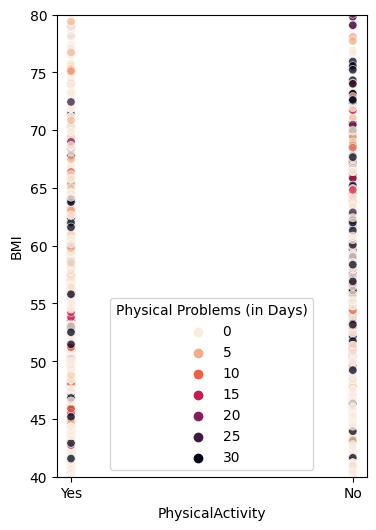

In [211]:
sns.scatterplot(data = df, x = "PhysicalActivity", y = "BMI", alpha = 0.75, hue = "PhysicalHealth",  palette = "rocket_r")

plt.ylim([40, 80]) # Segundo a OMS: 40 = Obeso classe III
plt.legend(title='Physical Problems (in Days)')
plt.gcf().set_size_inches(4, 6) # Define o tamanho da figura

plt.show()

Aqui se observa que as pessoas que não praticam atividade física regularmente e com os maiores BMI, têm maiores períodos (em dias) de problemas físicos do que as que praticam.